In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from EDA_functions import *
from DQN_functions import *

In [2]:
df_sp = pd.read_pickle('data/SP500.pkl')
df_ftse = pd.read_pickle('data/FTSE100.pkl')
df_nifty = pd.read_csv('data/nifty50.csv')

In [3]:
df_nifty = nifty_convert(df_nifty)
#remove first row of df_sp,df_ftse
df_sp = df_sp.iloc[1:]
df_ftse = df_ftse.iloc[1:]

Ten year return: 1.79%
Overall return: 3.64%


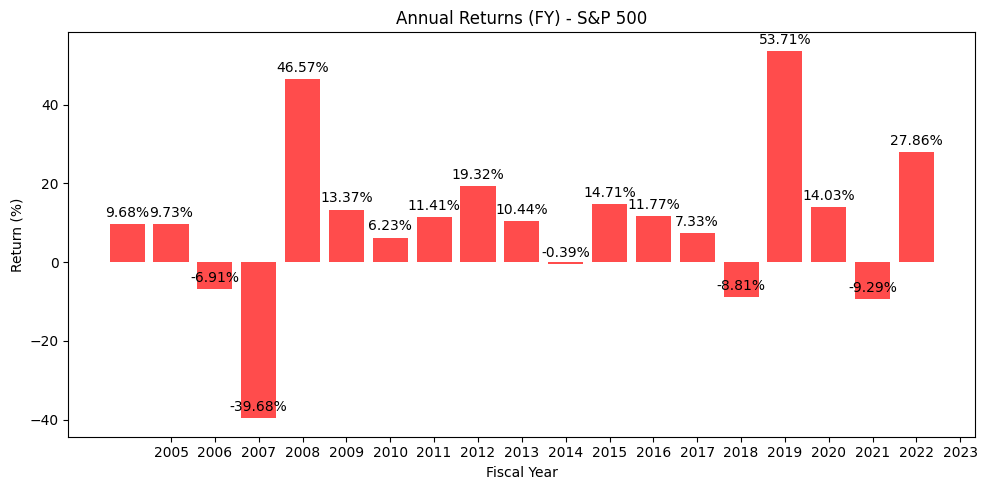

In [4]:
plot_fy_annual_returns(df_sp, 'Annual Returns (FY) - S&P 500')

Ten year return: 0.2%
Overall return: 0.8%


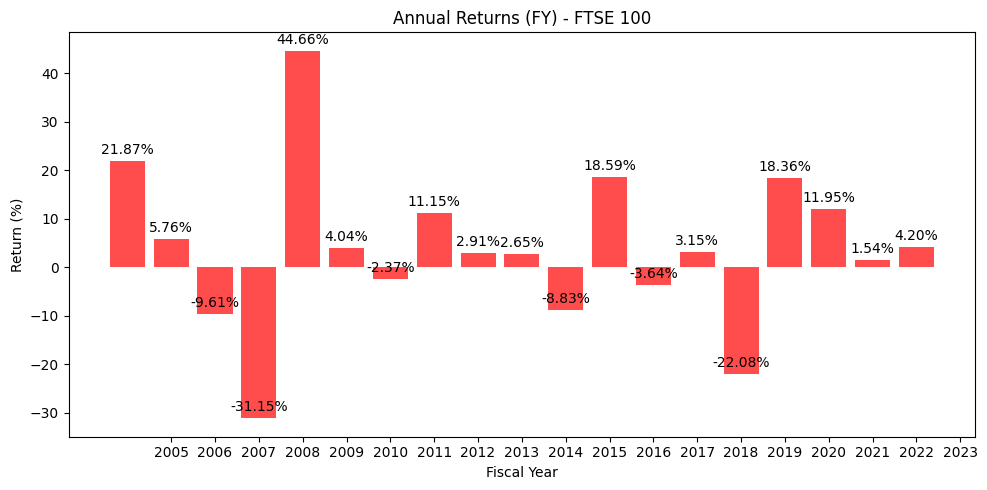

In [5]:
plot_fy_annual_returns(df_ftse, 'Annual Returns (FY) - FTSE 100')

Ten year return: 2.32%
Overall return: 11.27%


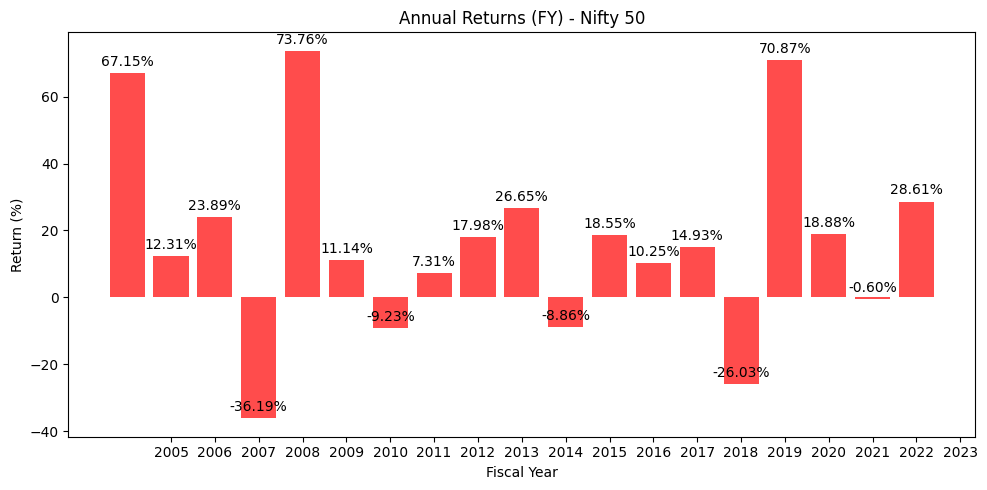

In [7]:
plot_fy_annual_returns(df_nifty, 'Annual Returns (FY) - Nifty 50')

In [8]:
#make a single table of the skewness and kurtoisis of the returns for all three dataframes
def calculate_skew_kurt(df):
    returns = df['Close'].pct_change().dropna()
    skew = returns.skew()
    kurt = returns.kurtosis()
    return skew, kurt

skew_sp, kurt_sp = calculate_skew_kurt(df_sp)
skew_ftse, kurt_ftse = calculate_skew_kurt(df_ftse)
skew_nifty, kurt_nifty = calculate_skew_kurt(df_nifty)

skew_kurt_df = pd.DataFrame({ 'Skewness': [skew_sp, skew_ftse, skew_nifty], 'Kurtosis': [kurt_sp, kurt_ftse, kurt_nifty] }, index=['S&P 500', 'FTSE 100', 'Nifty 50'])
display(skew_kurt_df.transpose())

,S&P 500,FTSE 100,Nifty 50
Skewness,-0.258876,-0.209688,-0.198635
Kurtosis,12.929490,10.276491,13.991394


In [6]:
#total returns

print('Total Return for S&P 500: ', (df_sp['Close'].iloc[-1]-df_sp['Close'].iloc[0])/df_sp['Close'].iloc[0])
print('Total Return for FTSE 100: ', (df_ftse['Close'].iloc[-1]-df_ftse['Close'].iloc[0])/df_ftse['Close'].iloc[0])
print('Total Return for Nifty 50: ', (df_nifty['Close'].iloc[-1]-df_nifty['Close'].iloc[0])/df_nifty['Close'].iloc[0])


Total Return for S&P 500:  3.640954886375754
Total Return for FTSE 100:  0.8030244055372266
Total Return for Nifty 50:  11.269887066194048


In [12]:
df_corr = pd.DataFrame()
df_corr['SP500'] = df_sp['Close']
df_corr['FTSE100'] = df_ftse['Close']
df_corr['NIFTY50'] = df_nifty['Close']
df_corr['SP500_return'] = df_sp['Close'].pct_change()
df_corr['FTSE100_return'] = df_ftse['Close'].pct_change()
df_corr['NIFTY50_return'] = df_nifty['Close'].pct_change()

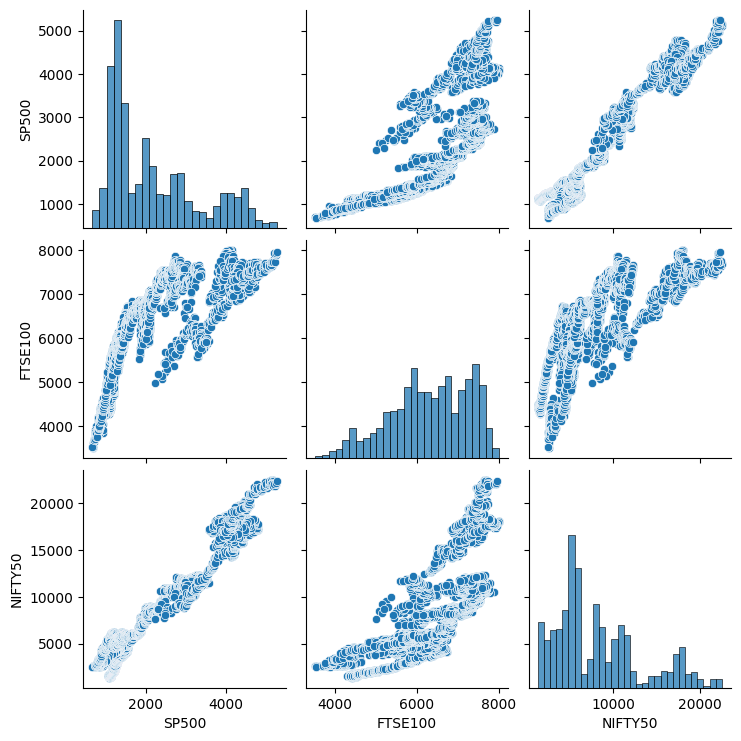

In [10]:
sns.pairplot(df_corr[['SP500', 'FTSE100', 'NIFTY50']])


In [11]:
display(round(df_corr[['SP500', 'FTSE100', 'NIFTY50']].corr(),2))

,SP500,FTSE100,NIFTY50
SP500,1.00,0.77,0.97
FTSE100,0.77,1.00,0.79
NIFTY50,0.97,0.79,1.00


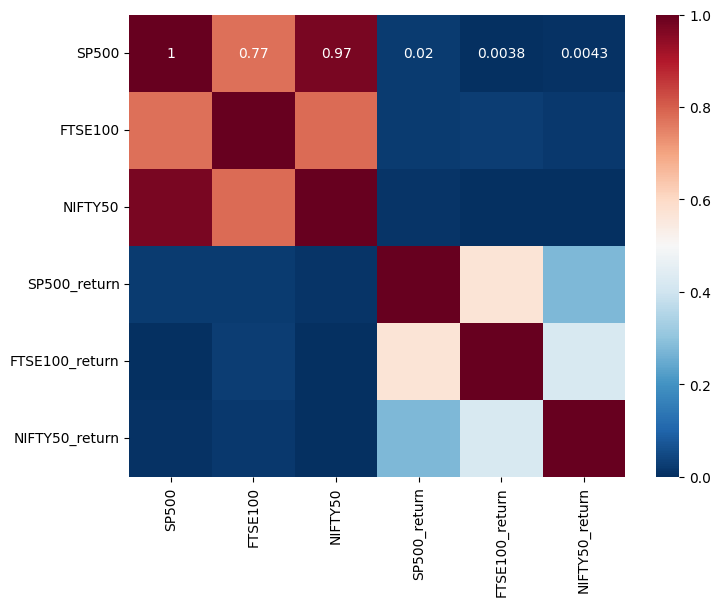

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='RdBu_r', vmin=0, vmax=1, ax=ax)
plt.show()


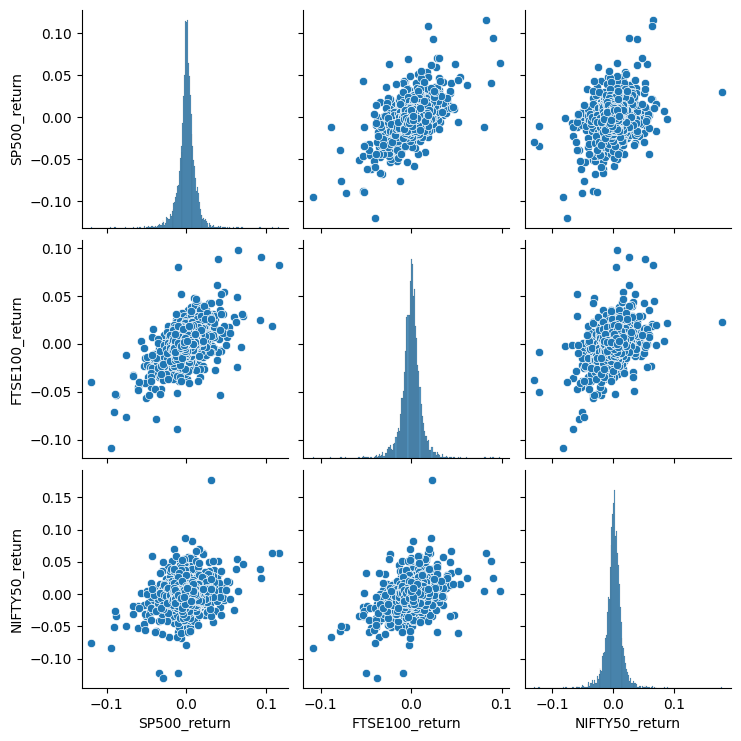

In [17]:
sns.pairplot(df_corr[['SP500_return', 'FTSE100_return', 'NIFTY50_return']])

In [16]:
display(round(df_corr[['SP500_return', 'FTSE100_return', 'NIFTY50_return']].corr(),2))

,SP500_return,FTSE100_return,NIFTY50_return
SP500_return,1.00,0.57,0.28
FTSE100_return,0.57,1.00,0.42
NIFTY50_return,0.28,0.42,1.00


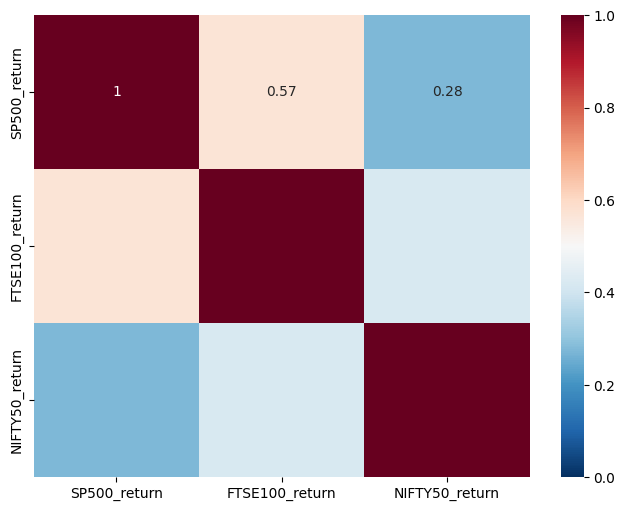

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_corr[['SP500_return', 'FTSE100_return', 'NIFTY50_return']].corr(), annot=True, cmap='RdBu_r', vmin=0, vmax=1, ax=ax)
plt.show()


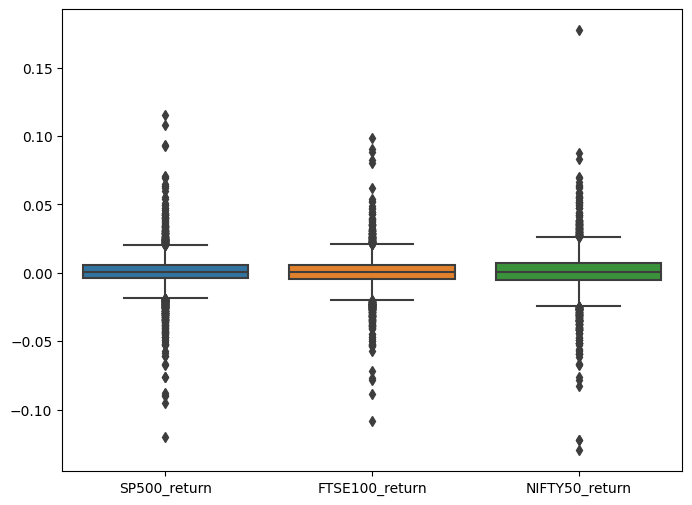

In [19]:
#create boxplots of all the returns

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_corr[['SP500_return', 'FTSE100_return', 'NIFTY50_return']], ax=ax)
plt.show()


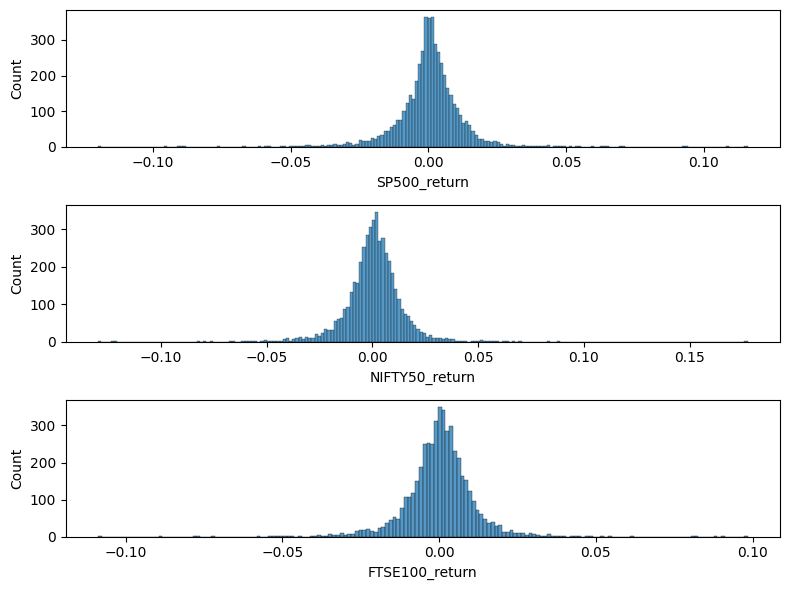

In [20]:
#create 3 histograms of all the returns

fig, ax = plt.subplots(3, 1, figsize=(8, 6))
sns.histplot(df_corr['SP500_return'], ax=ax[0])
sns.histplot(df_corr['FTSE100_return'], ax=ax[2])
sns.histplot(df_corr['NIFTY50_return'], ax=ax[1])

plt.tight_layout()
plt.show()


## DQN Comparison

In [4]:
df_nifty

,Open,High,Low,Close,Volume
Date,,,,,
2004-04-01,1771.45,1823.05,1771.45,1819.65,1.110700e+11
2004-04-02,1856.10,1856.30,1809.00,1841.10,1.187400e+11
2004-04-05,1841.10,1878.80,1840.00,1856.60,1.026000e+11
2004-04-06,1870.80,1876.15,1836.90,1851.15,1.094100e+11
2004-04-07,1856.40,1865.20,1833.95,1848.70,8.626000e+10
...,...,...,...,...,...
2024-03-21,21989.90,22080.95,21941.30,22011.95,3.531700e+08
2024-03-22,21932.20,22180.70,21883.30,22096.75,3.886600e+08
2024-03-26,21947.90,22073.20,21947.55,22004.70,3.284000e+08


In [5]:
df_sp = df_sp[['Open','High','Low','Close','Volume']]
df_ftse = df_ftse[['Open','High','Low','Close','Volume']]
df_nifty = df_nifty[['Open','High','Low','Close','Volume']]

df_sp['26ema'] = df_sp['Close'].ewm(span=26).mean()
df_sp['12ema'] = df_sp['Close'].ewm(span=12).mean()

df_ftse['26ema'] = df_ftse['Close'].ewm(span=26).mean()
df_ftse['12ema'] = df_ftse['Close'].ewm(span=12).mean()

df_nifty['26ema'] = df_nifty['Close'].ewm(span=26).mean()
df_nifty['12ema'] = df_nifty['Close'].ewm(span=12).mean()

In [6]:
window_size = 26
states_sp = create_states(df_sp, window_size)
states_ftse = create_states(df_ftse, window_size)
states_nifty = create_states(df_nifty, window_size)
input_dim_conv = 7
output_dim = 3
print("Shape of SP500 states:", states_sp.shape)
print("Shape of FTSE100 states:", states_ftse.shape)
print("Shape of Nifty50 states:", states_nifty.shape)


Shape of SP500 states: (5006, 26, 7)
Shape of FTSE100 states: (5023, 26, 7)
Shape of Nifty50 states: (4938, 26, 7)


In [7]:
sp_state_size = states_sp.shape[2]
ftse_state_size = states_ftse.shape[2]
nifty_state_size = states_nifty.shape[2]

In [8]:
sp_model = ConvDQN(input_dim_conv, output_dim, window_size)
ftse_model = ConvDQN(input_dim_conv, output_dim, window_size)
nifty_model = ConvDQN(input_dim_conv, output_dim, window_size)
sp_agent = DQNAgent(sp_state_size, output_dim, window_size,sp_model, lr=0.0001, gamma=0.95, epsilon=0, epsilon_min=0, epsilon_decay=0.9995)
ftse_agent = DQNAgent(ftse_state_size, output_dim, window_size,ftse_model, lr=0.0001, gamma=0.95, epsilon=0, epsilon_min=0, epsilon_decay=0.9995)
nifty_agent = DQNAgent(nifty_state_size, output_dim, window_size,nifty_model, lr=0.0001, gamma=0.95, epsilon=0, epsilon_min=0, epsilon_decay=0.9995)

In [9]:
sp_model_path = 'SP500/DQN_CNN_updated_reward_MA_800ep.pth'
ftse_model_path = 'FTSE100/DQN_CNN_updated_reward_MA_800ep.pth'
nifty_model_path = 'NIFTY50/DQN_CNN_reward_MA_800ep.pth'

sp_agent.model.load_state_dict(torch.load(sp_model_path))
ftse_agent.model.load_state_dict(torch.load(ftse_model_path))
nifty_agent.model.load_state_dict(torch.load(nifty_model_path))

sp_agent.model.eval()
ftse_agent.model.eval()
nifty_agent.model.eval()


ConvDQN(
  (conv1): Conv1d(7, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=1664, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [10]:
#evaluate SP500 model on all data
sp_sp_log = evaluate_agent(sp_agent,states_sp)
sp_ftse_log = evaluate_agent(sp_agent,states_ftse)
sp_nifty_log = evaluate_agent(sp_agent,states_nifty)


#evaluate FTSE100 model on all data
ftse_sp_log = evaluate_agent(ftse_agent,states_sp)
ftse_ftse_log = evaluate_agent(ftse_agent,states_ftse)
ftse_nifty_log = evaluate_agent(ftse_agent,states_nifty)

#evaluate Nifty50 model on all data
nifty_sp_log = evaluate_agent(nifty_agent,states_sp)
nifty_ftse_log = evaluate_agent(nifty_agent,states_ftse)
nifty_nifty_log = evaluate_agent(nifty_agent,states_nifty)


In [11]:
from Baseline_functions import capital_calculation

In [12]:
sp_sp_log['Close'] = sp_sp_log['Price']
sp_ftse_log['Close'] = sp_ftse_log['Price']
sp_nifty_log['Close'] = sp_nifty_log['Price']

ftse_sp_log['Close'] = ftse_sp_log['Price']
ftse_ftse_log['Close'] = ftse_ftse_log['Price']
ftse_nifty_log['Close'] = ftse_nifty_log['Price']

nifty_sp_log['Close'] = nifty_sp_log['Price']
nifty_ftse_log['Close'] = nifty_ftse_log['Price']
nifty_nifty_log['Close'] = nifty_nifty_log['Price']

print("Profit for SP500 model on SP500 data:")
sp_sp_log['Capital'] = capital_calculation(sp_sp_log,'Action')
print("Profit for SP500 model on FTSE100 data:")
sp_ftse_log['Capital'] = capital_calculation(sp_ftse_log,'Action')
print("Profit for SP500 model on Nifty50 data:")
sp_nifty_log['Capital'] = capital_calculation(sp_nifty_log,'Action')

print("Profit for FTSE100 model on SP500 data:")
ftse_sp_log['Capital'] = capital_calculation(ftse_sp_log,'Action')
print("Profit for FTSE100 model on FTSE100 data:")
ftse_ftse_log['Capital'] = capital_calculation(ftse_ftse_log,'Action')
print("Profit for FTSE100 model on Nifty50 data:")
ftse_nifty_log['Capital'] = capital_calculation(ftse_nifty_log,'Action')

print("Profit for Nifty50 model on SP500 data:")
nifty_sp_log['Capital'] = capital_calculation(nifty_sp_log,'Action')
print("Profit for Nifty50 model on FTSE100 data:")
nifty_ftse_log['Capital'] = capital_calculation(nifty_ftse_log,'Action')
print("Profit for Nifty50 model on Nifty50 data:")
nifty_nifty_log['Capital'] = capital_calculation(nifty_nifty_log,'Action')

Profit for SP500 model on SP500 data:
Total Pofit: 491.61619618969655
Profit for SP500 model on FTSE100 data:
Total Pofit: 44.59407360849852
Profit for SP500 model on Nifty50 data:
Total Pofit: 529.7836507350172
Profit for FTSE100 model on SP500 data:
Total Pofit: 417.32412429221586
Profit for FTSE100 model on FTSE100 data:
Total Pofit: 88.65245109713686
Profit for FTSE100 model on Nifty50 data:
Total Pofit: 898.8976925322353
Profit for Nifty50 model on SP500 data:
Total Pofit: 0
Profit for Nifty50 model on FTSE100 data:
Total Pofit: 0.2593632423149188
Profit for Nifty50 model on Nifty50 data:
Total Pofit: 5.173443177511629


<Axes: >

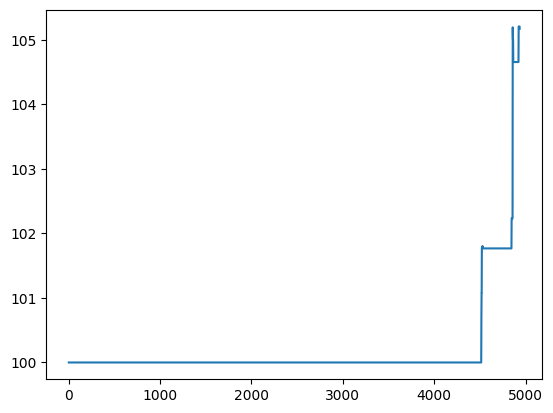

In [13]:
nifty_nifty_log.Capital.plot()

In [14]:
returns_dict = {
    'SP500_Model': {
        'SP500': (sp_sp_log['Capital'].iloc[-1]-100)/100,
        'FTSE100': (sp_ftse_log['Capital'].iloc[-1]-100)/100,
        'Nifty50': (sp_nifty_log['Capital'].iloc[-1]-100)/100},
    'FTSE100_Model': {
        'SP500': (ftse_sp_log['Capital'].iloc[-1]-100)/100,
        'FTSE100': (ftse_ftse_log['Capital'].iloc[-1]-100)/100,
        'Nifty50': (ftse_nifty_log['Capital'].iloc[-1]-100)/100},
    'Nifty50_Model': {
        'SP500': (nifty_sp_log['Capital'].iloc[-1]-100)/100,
        'FTSE100': (nifty_ftse_log['Capital'].iloc[-1]-100)/100,
        'Nifty50': (nifty_nifty_log['Capital'].iloc[-1]-100)/100}}
returns_df = pd.DataFrame(returns_dict)
display(round(returns_df,4))

,SP500_Model,FTSE100_Model,Nifty50_Model
SP500,4.9162,4.1732,0.0000
FTSE100,0.4459,0.8865,0.0026
Nifty50,5.2978,8.9890,0.0517


In [15]:
evaluation_sp = sp_sp_log[['Close','Capital']]
evaluation_sp['Date'] = df_sp.iloc[window_size+1:].index
evaluation_sp.set_index('Date',inplace=True)
evaluation_sp.rename(columns={'Capital':'SP500'},inplace=True)
evaluation_sp['FTSE100'] = list(ftse_sp_log['Capital'])
evaluation_sp['Nifty50'] = list(nifty_sp_log['Capital'])

In [16]:
evaluation_ftse = ftse_ftse_log[['Close','Capital']]
evaluation_ftse['Date'] = df_ftse.iloc[window_size+1:].index
evaluation_ftse.set_index('Date',inplace=True)
evaluation_ftse.rename(columns={'Capital':'FTSE100'},inplace=True)
evaluation_ftse['SP500'] = list(sp_ftse_log['Capital'])
evaluation_ftse['Nifty50'] = list(nifty_ftse_log['Capital'])

In [17]:
evaluation_nifty = nifty_nifty_log[['Close','Capital']]
evaluation_nifty['Date'] = df_nifty.iloc[window_size+1:].index
evaluation_nifty.set_index('Date',inplace=True)
evaluation_nifty.rename(columns={'Capital':'Nifty50'},inplace=True)
evaluation_nifty['SP500'] = list(sp_nifty_log['Capital'])
evaluation_nifty['FTSE100'] = list(ftse_nifty_log['Capital'])

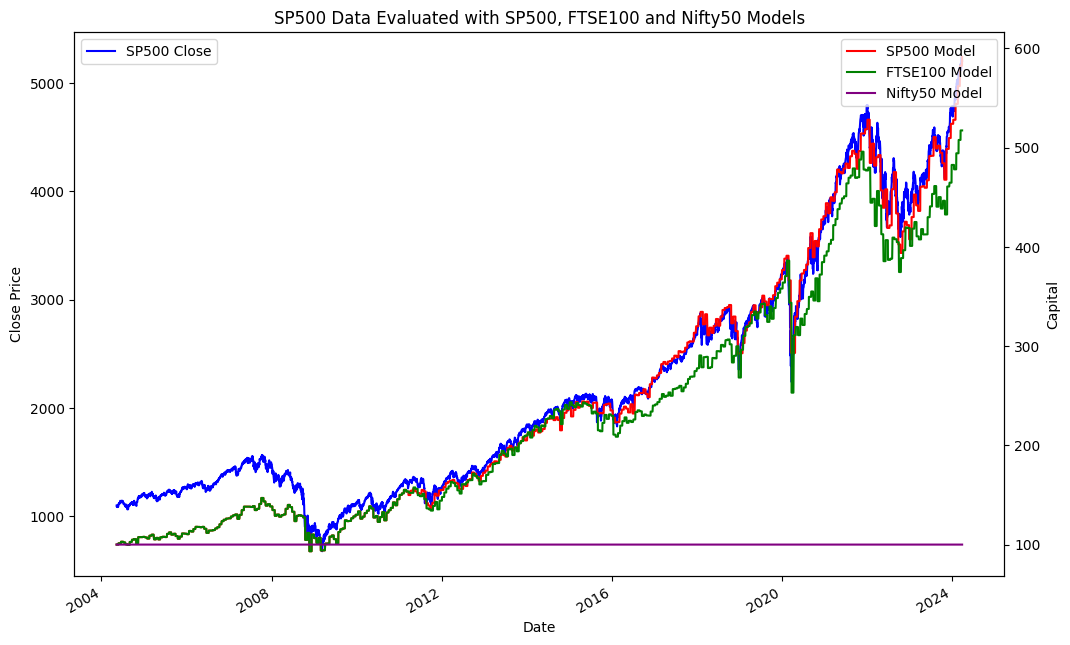

In [29]:
#plot dual axis of df where Close is on one axis and SP500, FTSE100 and Nifty50 are on the other axis
fig, ax = plt.subplots(figsize=(12, 8))
ax2 = ax.twinx()
evaluation_sp['Close'].plot(ax=ax, color='blue', label='SP500 Close')
evaluation_sp['SP500'].plot(ax=ax2, color='red', label='SP500 Model')
evaluation_sp['FTSE100'].plot(ax=ax2, color='green', label='FTSE100 Model')
evaluation_sp['Nifty50'].plot(ax=ax2, color='purple', label='Nifty50 Model')
ax.set_ylabel('Close Price')
ax2.set_ylabel('Capital')
ax.set_xlabel('Date')
ax.set_title('SP500 Data Evaluated with SP500, FTSE100 and Nifty50 Models')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [28]:
print('SP500 Data Evaluated with SP500, FTSE100 and Nifty50 Models')
evaluation_sp.corr()

SP500 Data Evaluated with SP500, FTSE100 and Nifty50 Models


,Close,SP500,FTSE100,Nifty50
Close,1.000000,0.992111,0.989677,NaN
SP500,0.992111,1.000000,0.995179,NaN
FTSE100,0.989677,0.995179,1.000000,NaN
Nifty50,NaN,NaN,NaN,NaN


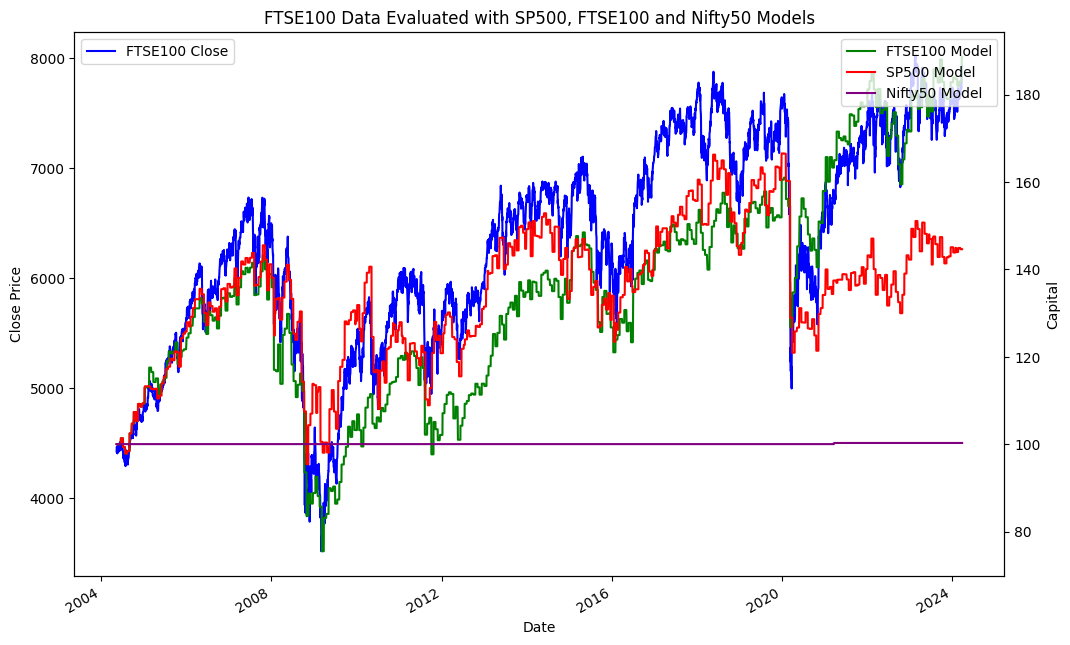

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
ax2 = ax.twinx()
evaluation_ftse['Close'].plot(ax=ax, color='blue', label='FTSE100 Close')
evaluation_ftse['FTSE100'].plot(ax=ax2, color='green', label='FTSE100 Model')
evaluation_ftse['SP500'].plot(ax=ax2, color='red', label='SP500 Model')
evaluation_ftse['Nifty50'].plot(ax=ax2, color='purple', label='Nifty50 Model')
ax.set_ylabel('Close Price')
ax2.set_ylabel('Capital')
ax.set_xlabel('Date')
ax.set_title('FTSE100 Data Evaluated with SP500, FTSE100 and Nifty50 Models')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [27]:
print('FTSE100 Data Evaluated with SP500, FTSE100 and Nifty50 Models')
evaluation_ftse.corr()

FTSE100 Data Evaluated with SP500, FTSE100 and Nifty50 Models


,Close,FTSE100,SP500,Nifty50
Close,1.000000,0.896754,0.893164,0.480529
FTSE100,0.896754,1.000000,0.701652,0.703044
SP500,0.893164,0.701652,1.000000,0.169564
Nifty50,0.480529,0.703044,0.169564,1.000000


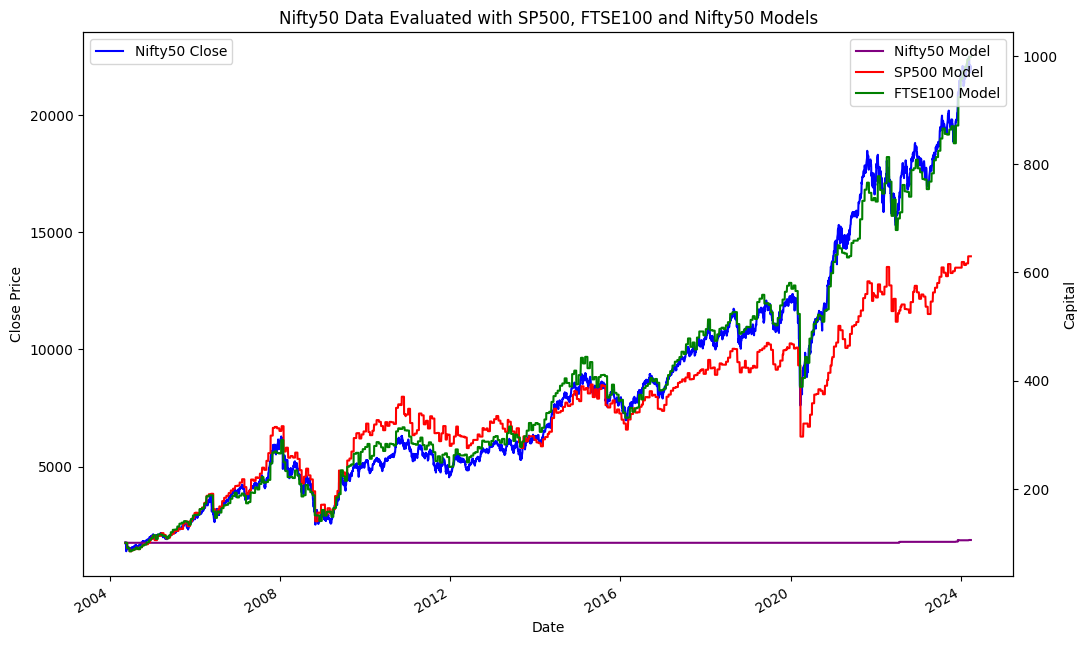

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
ax2 = ax.twinx()
evaluation_nifty['Close'].plot(ax=ax, color='blue', label='Nifty50 Close')
evaluation_nifty['Nifty50'].plot(ax=ax2, color='purple', label='Nifty50 Model')
evaluation_nifty['SP500'].plot(ax=ax2, color='red', label='SP500 Model')
evaluation_nifty['FTSE100'].plot(ax=ax2, color='green', label='FTSE100 Model')
ax.set_ylabel('Close Price')
ax2.set_ylabel('Capital')
ax.set_xlabel('Date')
ax.set_title('Nifty50 Data Evaluated with SP500, FTSE100 and Nifty50 Models')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [26]:
print('Nifty50 Data Evaluated with SP500, FTSE100 and Nifty50 Models')
evaluation_nifty.corr()

Nifty50 Data Evaluated with SP500, FTSE100 and Nifty50 Models


,Close,Nifty50,SP500,FTSE100
Close,1.000000,0.610741,0.955673,0.996018
Nifty50,0.610741,1.000000,0.500751,0.609393
SP500,0.955673,0.500751,1.000000,0.966426
FTSE100,0.996018,0.609393,0.966426,1.000000
